# 0. Installing nessacery packages

In [1]:
!pip install transformers==4.17 torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 117.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install evaluate sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requir

In [3]:
!pip install datasets

# 1. Dataset Preparation

In [4]:
from datasets import load_dataset

# Loading the csv file as a hugging face dataset
dataset = load_dataset("csv", data_files="hindi_marathi_10k (2).csv")

Generating train split: 0 examples [00:00, ? examples/s]

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Hindi', 'Marathi'],
        num_rows: 10000
    })
})

In [6]:
# Splitting the data into train and test
dataset = dataset["train"].train_test_split(test_size=0.05)

In [7]:
dataset["train"][10]

{'Hindi': 'उन्होंने लोक अभियोक्ताओं से अपराध नियंत्रण नीतियां बनाने में अधिक रणनीतिक और अतिसक्रिय भूमिका निभाने की गुहार की।',
 'Marathi': 'गुन्हेगारी नियंत्रण धोरणे तयार करण्यात अधिक धोरणात्मक आणि अतिसक्रिय भूमिका बजावण्याचे आवाहन त्यांनी सरकारी वकिलांना केले. '}

# 2. Model and Tokenizer Setup

- Loading the mt5-small model and matching tokenizer from the transformers library

In [8]:
from transformers import MT5ForConditionalGeneration, MT5Tokenizer

model_name = "google/mt5-small"

tokenizer = MT5Tokenizer.from_pretrained(model_name, truncation = True, max_length = 128)
model = MT5ForConditionalGeneration.from_pretrained(model_name)

Downloading:   0%|          | 0.00/4.11M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/553 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

# 3. Preprocessing and Tokenization

In [9]:
# Since mT5 is trained using prompts, adding this prefix will tell mt5 what type of generation we are looking for
prefix = "translate Hindi to Marathi: "

In [10]:
def preprocess_function(examples):

    # Adding the prefix to the hindi input's and creating a list of inputs
    inputs = [prefix + example for example in examples["Hindi"]]
    # Creating a list of target marathi sentences
    targets = [example for example in examples["Marathi"]]

    # Tokenizing the inputs into input_ids and attention_masks
    model_inputs = tokenizer(inputs, max_length=128, truncation=True)

    # Since the input and targets languages, we need to tell the tokenizer to treat the next tokenization as the target side
    with tokenizer.as_target_tokenizer():
      labels = tokenizer(targets, max_length=128, truncation=True)

    model_inputs["labels"] = labels["input_ids"]

    return model_inputs

In [11]:
# Applying the preprocess function to the dataset
tokenized_dataset = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/9500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [12]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['Hindi', 'Marathi', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 9500
    })
    test: Dataset({
        features: ['Hindi', 'Marathi', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 500
    })
})

In [13]:
from transformers import DataCollatorForSeq2Seq

# data_collator is used to pad the entire dataset to the length of the longest sequence
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

# 4. Tracking Metrics

- Creating a compute_metrics function that can be passed onto the Trainer during evaluation -- It implements the Bleu score

- Create a callback to track the training losses

In [14]:
from evaluate import load
import numpy as np

metric = load("sacrebleu")


def compute_metrics(eval_preds):
    preds, labels = eval_preds
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # SacreBLEU expects a list of references, each a list of references for that sentence
    decoded_labels = [[label] for label in decoded_labels]

    result = metric.compute(predictions=decoded_preds, references=decoded_labels)
    return {"bleu": result["score"]}

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [15]:
from transformers import TrainerCallback

# Inheriting from the TrainerCallback class in order to track the training loss
class LossTrackingCallback(TrainerCallback):
    # Constructor initializes a list to store the tranining losses
    def __init__(self):
        self.training_losses = []

    # Gets called when the Trainer logs something
    def on_log(self, args, state, control, logs=None, **kwargs):
        # Adding the loss from the latest log to the list
        if logs is not None and "loss" in logs:
            self.training_losses.append(logs["loss"])

loss_tracker = LossTrackingCallback()

# 5. Fine-tuning

In [16]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments, DataCollatorForSeq2Seq

In [17]:
training_args = Seq2SeqTrainingArguments(
    output_dir="./results",           # Decides where the checkpoints, weights, logs etc get stored during training
    evaluation_strategy="no",         # Decides when to evaluate, here: no, meaning the model would have to be evaluated after training, manually
    learning_rate=5e-5,               # Learning Rate
    per_device_train_batch_size=8,    # Training Batch size
    per_device_eval_batch_size=1,     # Evaluation Batch size
    gradient_accumulation_steps=2,    # Set to 2 to acheive similar results as to a training batch size of 16 because of GPU limitations
    weight_decay=0.01,                # Reguralization
    save_total_limit=3,               # Saves latest 3 checkpoints
    predict_with_generate=True,       # To ensure the outputs are not just logits, and generated by the .generate() method, this is needed for calculating bleu
    generation_max_length=256,        # Maximum output length that can be generated
    generation_num_beams=4,           # Beam searches during output
    fp16=False,                       # Since the model was trained on bf16, setting this to true could cause improper tracking of loss
    report_to="none",                 # No logging to tensorbord/wandb etc
    num_train_epochs=20,              # Epochs
)

In [18]:
# Initializing the trainer with the above arguments and dataset
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics = compute_metrics,
    callbacks=[loss_tracker]
)

In [19]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `MT5ForConditionalGeneration.forward` and have been ignored: Marathi, Hindi. If Marathi, Hindi are not expected by `MT5ForConditionalGeneration.forward`,  you can safely ignore this message.
/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 9500
  Num Epochs = 20
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 2
  Total optimization steps = 11880


Step,Training Loss
500,7.770300
1000,3.573000
1500,3.153500
2000,2.918700
2500,2.760100
3000,2.635200
3500,2.528000
4000,2.448200
4500,2.374400
5000,2.320400


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-500/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-500/special_tokens_map.json
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-1000/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-1000/special_tokens_map.json
Saving model checkpoint to ./results/checkpoint-1500
Configuration saved in ./results/checkpoint-1500/config.json
Model weights saved in ./results/checkpoint-1500/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-1500/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-1500/special_toke

TrainOutput(global_step=11880, training_loss=2.5794280646224617, metrics={'train_runtime': 5593.9929, 'train_samples_per_second': 33.965, 'train_steps_per_second': 2.124, 'total_flos': 1.519603478790144e+16, 'train_loss': 2.5794280646224617, 'epoch': 20.0})

# 6. Model Evaluation

In [20]:
trainer.evaluate()

The following columns in the evaluation set  don't have a corresponding argument in `MT5ForConditionalGeneration.forward` and have been ignored: Marathi, Hindi. If Marathi, Hindi are not expected by `MT5ForConditionalGeneration.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 500
  Batch size = 1


{'eval_loss': 1.4977549314498901,
 'eval_bleu': 15.655694950277507,
 'eval_runtime': 377.1543,
 'eval_samples_per_second': 1.326,
 'eval_steps_per_second': 1.326,
 'epoch': 20.0}

Plotting the Training loss over steps

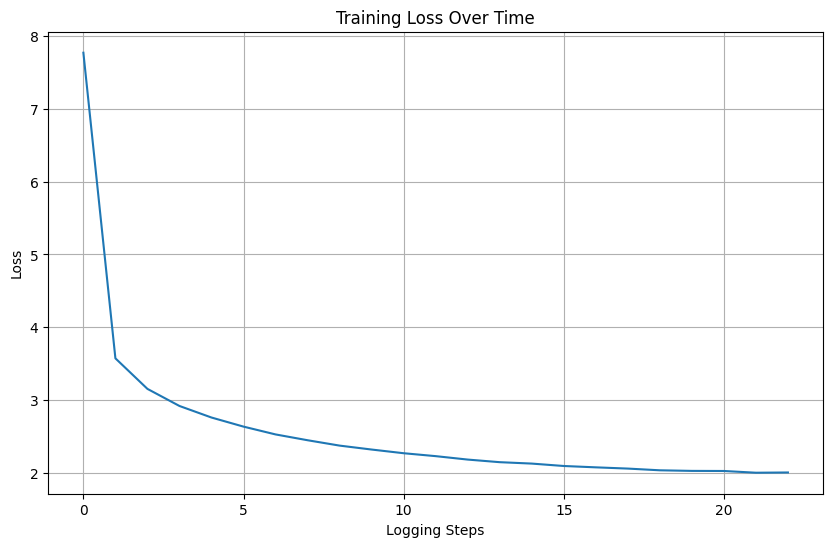

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(loss_tracker.training_losses)
plt.title('Training Loss Over Time')
plt.xlabel('Logging Steps')
plt.ylabel('Loss')
plt.grid(True)
plt.savefig('training_loss_curve.png')
plt.show()

# Inference on 1 sentence

In [22]:
import torch


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Input text with the preffix
input_text = "translate Hindi to Marathi: मेरे दोस्त और मैं हर रविवार को क्रिकेट खेलते हैं।"
inputs = tokenizer(input_text, return_tensors="pt").to(device)  # move inputs to the same device

# Generate output
output_ids = model.generate(
    inputs["input_ids"],
    max_length=128,
    num_beams=3,
    early_stopping=True
)

# Decode output
output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
print(output_text)


माझ्या मित्र आणि मी प्रत्येक रविवार क्रिकेट खेळतो.


# Inference on 50 input sentences

In [24]:
import pandas as pd

df = pd.read_csv("hindi.csv")

input_text = df["hindi_sentence"]


with open("translation_output.csv", "w") as f:
  f.write("Hindi Sentence, Marathi Sentence\n")
  for text in input_text:
    inputs = tokenizer(prefix + text, return_tensors="pt").to(device)

    # Generate output
    output_ids = model.generate(
        inputs["input_ids"],
        max_length=128,
        num_beams=4,
        early_stopping=True
    )

    # Decode output
    output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    f.write(f"{text}, {output_text}\n")